In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import keras
from keras_unet.models import custom_unet
from sklearn.model_selection import train_test_split

2023-04-25 16:22:02.117176: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
/home/jiehyun.kim001/miniconda3/envs/O/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


In [3]:
import cactas as C

In [4]:
DATAPATH = '/raid/mpsych/CACTAS/DATA/ESUS/'
images_file = os.path.join(DATAPATH, 'images.npy')
labels_file = os.path.join(DATAPATH, 'labels.npy')

In [5]:
images = np.load(images_file)
labels = np.load(labels_file)

In [6]:
# full dataset does not have the last channel
images = images.reshape(images.shape[0],images.shape[1],images.shape[2],1)
labels = labels.reshape(labels.shape[0],labels.shape[1],labels.shape[2],1)

In [7]:
images = images.astype(np.float64)
labels = labels.astype(np.float64)

In [8]:
p = np.random.permutation(len(images))
images = images[p]
labels = labels[p]

In [9]:
for i in range(images.shape[0]):
    
    images[i] = (images[i] - images[i].min()) / (images[i].max() - images[i].min()) # normalize individually
    

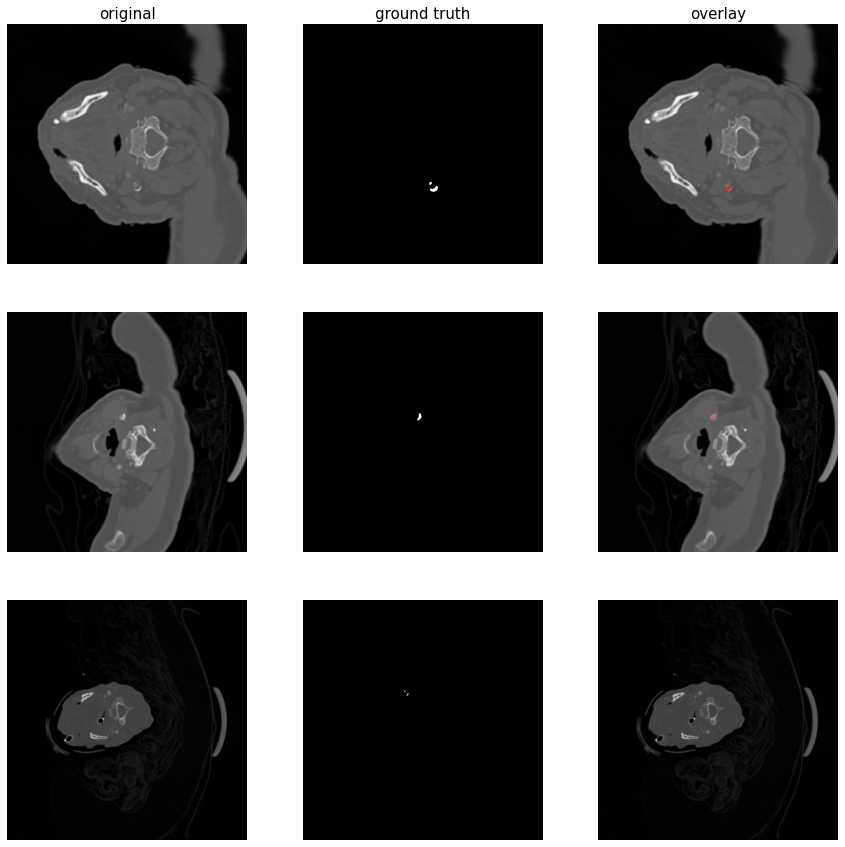

In [10]:
from keras_unet.utils import plot_imgs

plot_imgs(org_imgs=images, mask_imgs=labels, nm_img_to_plot=3, figsize=5)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_val, y_train, y_val = C.Util.split_1(images, labels, val_size=0.2)

In [13]:
from keras_unet_collection import models, losses
import torch

model = models.swin_unet_2d((512, 512, 1), filter_num_begin=64,
                               n_labels=1, depth=4, stack_num_down=4, stack_num_up=4,
                               patch_size=(4, 4), num_heads=[4, 8, 16, 16],
                               window_size=[4, 2, 2, 2], num_mlp=512, 
                               output_activation='Sigmoid', shift_window=True, name='swin_unet')

#Softmax

2023-04-25 16:22:06.902562: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-04-25 16:22:07.075571: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:0f:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-04-25 16:22:07.078237: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:90:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-04-25 16:22:07.078256: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-04-25 16:22:07.078300: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-04-25 

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


2023-04-25 16:22:07.111610: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-25 16:22:07.328870: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:0f:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-04-25 16:22:07.331352: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:90:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-04-25 16:22:07.341049: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1871] Adding visible 

In [14]:
from tensorflow.keras import optimizers
from keras_unet.metrics import iou, iou_thresholded, dice_coef
from keras_unet_collection import losses

In [15]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(learning_rate = 0.001),
              metrics=[iou, iou_thresholded])

In [ ]:
history = model.fit(X_train,
                    y_train,
                    batch_size=16,
                    epochs=200,
                    validation_data=(X_val, y_val))
                    #callbacks = [earlystopping])

2023-04-25 16:22:12.615204: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-04-25 16:22:12.637230: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245645000 Hz


Epoch 1/200


2023-04-25 16:22:37.317687: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-04-25 16:22:38.461958: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2023-04-25 16:22:38.462322: I tensorflow/stream_executor/cuda/cuda_blas.cc:1838] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-04-25 16:22:38.597747: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-04-25 16:22:38.788317: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8500
2023-04-25 16:22:39.536670: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.0
2023-04-25 16:22:39.536694: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2023-04-25 16:22:39.53706

39/39 [==============================] - 62s 880ms/step - loss: 0.0608 - iou: 8.6842e-04 - iou_thresholded: 0.0012 - val_loss: 0.0034 - val_iou: 8.7631e-04 - val_iou_thresholded: 0.0027
Epoch 2/200
39/39 [==============================] - 29s 737ms/step - loss: 0.0026 - iou: 9.7796e-04 - iou_thresholded: 0.0014 - val_loss: 0.0020 - val_iou: 0.0017 - val_iou_thresholded: 0.0027
Epoch 3/200
39/39 [==============================] - 29s 740ms/step - loss: 0.0018 - iou: 0.0014 - iou_thresholded: 0.0013 - val_loss: 0.0017 - val_iou: 0.0024 - val_iou_thresholded: 0.0027
Epoch 4/200
39/39 [==============================] - 29s 736ms/step - loss: 0.0024 - iou: 0.0017 - iou_thresholded: 0.0014 - val_loss: 0.0076 - val_iou: 0.0027 - val_iou_thresholded: 0.0027
Epoch 5/200
39/39 [==============================] - 29s 740ms/step - loss: 0.0042 - iou: 9.5677e-04 - iou_thresholded: 0.0013 - val_loss: 0.0022 - val_iou: 0.0020 - val_iou_thresholded: 0.0027
Epoch 6/200
39/39 [===========================

Epoch 43/200
39/39 [==============================] - 29s 740ms/step - loss: 2.1728e-04 - iou: 0.4753 - iou_thresholded: 0.5911 - val_loss: 3.7633e-04 - val_iou: 0.3728 - val_iou_thresholded: 0.4462
Epoch 44/200
39/39 [==============================] - 29s 736ms/step - loss: 2.2032e-04 - iou: 0.4746 - iou_thresholded: 0.5837 - val_loss: 3.6508e-04 - val_iou: 0.3743 - val_iou_thresholded: 0.4600
Epoch 45/200
39/39 [==============================] - 29s 735ms/step - loss: 1.9720e-04 - iou: 0.5086 - iou_thresholded: 0.6272 - val_loss: 3.7805e-04 - val_iou: 0.3864 - val_iou_thresholded: 0.4417
Epoch 46/200
39/39 [==============================] - 29s 734ms/step - loss: 1.8336e-04 - iou: 0.5342 - iou_thresholded: 0.6536 - val_loss: 3.7585e-04 - val_iou: 0.3962 - val_iou_thresholded: 0.4561
Epoch 47/200
39/39 [==============================] - 29s 739ms/step - loss: 1.7665e-04 - iou: 0.5422 - iou_thresholded: 0.6674 - val_loss: 3.4605e-04 - val_iou: 0.4115 - val_iou_thresholded: 0.4848
Epoch

39/39 [==============================] - 29s 748ms/step - loss: 5.5131e-05 - iou: 0.8117 - iou_thresholded: 0.9030 - val_loss: 4.1119e-04 - val_iou: 0.5185 - val_iou_thresholded: 0.5466
Epoch 85/200
39/39 [==============================] - 29s 741ms/step - loss: 4.9771e-05 - iou: 0.8264 - iou_thresholded: 0.9176 - val_loss: 4.2704e-04 - val_iou: 0.5135 - val_iou_thresholded: 0.5419
Epoch 86/200
39/39 [==============================] - 29s 736ms/step - loss: 4.8016e-05 - iou: 0.8308 - iou_thresholded: 0.9181 - val_loss: 4.4134e-04 - val_iou: 0.5104 - val_iou_thresholded: 0.5339
Epoch 87/200
39/39 [==============================] - 29s 736ms/step - loss: 4.5262e-05 - iou: 0.8367 - iou_thresholded: 0.9243 - val_loss: 4.3186e-04 - val_iou: 0.5224 - val_iou_thresholded: 0.5517
Epoch 88/200
39/39 [==============================] - 29s 738ms/step - loss: 4.3177e-05 - iou: 0.8452 - iou_thresholded: 0.9319 - val_loss: 4.3266e-04 - val_iou: 0.5232 - val_iou_thresholded: 0.5511
Epoch 89/200
39/39

39/39 [==============================] - 29s 744ms/step - loss: 1.4567 - iou: 8.8787e-04 - iou_thresholded: 8.8744e-04 - val_loss: 1.4522 - val_iou: 9.9390e-04 - val_iou_thresholded: 9.9980e-04
Epoch 126/200
39/39 [==============================] - 29s 738ms/step - loss: 1.3664 - iou: 9.9555e-04 - iou_thresholded: 9.8878e-04 - val_loss: 1.3622 - val_iou: 0.0010 - val_iou_thresholded: 0.0010
Epoch 127/200
39/39 [==============================] - 29s 740ms/step - loss: 1.2835 - iou: 0.0011 - iou_thresholded: 0.0011 - val_loss: 1.2904 - val_iou: 0.0010 - val_iou_thresholded: 0.0011
Epoch 128/200
39/39 [==============================] - 29s 736ms/step - loss: 1.2113 - iou: 0.0012 - iou_thresholded: 0.0012 - val_loss: 1.2170 - val_iou: 0.0012 - val_iou_thresholded: 0.0012
Epoch 129/200
39/39 [==============================] - 29s 735ms/step - loss: 1.1447 - iou: 0.0013 - iou_thresholded: 0.0013 - val_loss: 1.1510 - val_iou: 0.0013 - val_iou_thresholded: 0.0013
Epoch 130/200
39/39 [=========

Epoch 168/200
39/39 [==============================] - 29s 742ms/step - loss: 0.2358 - iou: 0.0021 - iou_thresholded: 0.0021 - val_loss: 0.2457 - val_iou: 0.0016 - val_iou_thresholded: 0.0016
Epoch 169/200
39/39 [==============================] - 29s 739ms/step - loss: 0.2278 - iou: 0.0020 - iou_thresholded: 0.0020 - val_loss: 0.2379 - val_iou: 0.0017 - val_iou_thresholded: 0.0017
Epoch 170/200
39/39 [==============================] - 29s 739ms/step - loss: 0.2206 - iou: 0.0023 - iou_thresholded: 0.0023 - val_loss: 0.2300 - val_iou: 0.0017 - val_iou_thresholded: 0.0017
Epoch 171/200
39/39 [==============================] - 29s 741ms/step - loss: 0.2136 - iou: 0.0023 - iou_thresholded: 0.0024 - val_loss: 0.2213 - val_iou: 0.0015 - val_iou_thresholded: 0.0015
Epoch 172/200
39/39 [==============================] - 29s 742ms/step - loss: 0.2068 - iou: 0.0023 - iou_thresholded: 0.0023 - val_loss: 0.2164 - val_iou: 0.0017 - val_iou_thresholded: 0.0017
Epoch 173/200
39/39 [===================

In [ ]:
from keras_unet.utils import plot_segm_history

plot_segm_history(history)

In [ ]:
y_pred = model.predict(X_val)

In [ ]:
from keras_unet.utils import plot_imgs

plot_imgs(org_imgs=X_val, mask_imgs=y_val, pred_imgs=y_pred, nm_img_to_plot=10)

In [ ]:
loss, iou, iou_thresholded = model.evaluate(X_val, y_val)